In [1]:
import pandas as pd
from datasets import load_metric
import jiwer

In [2]:
df_sova_commonvoice = pd.read_csv('result_wer/sova_commonvoice.csv')

In [3]:
df_vosk_commonvoice = pd.read_csv('result_wer/vosk_api_commonvoice.csv')

In [4]:
df_anton_commonvoice = pd.read_csv('result_wer/anton_commonvoice.csv')

In [5]:
df_jonatas_commonvoice = pd.read_csv('result_wer/jonas_commonvoice.csv')

In [6]:
df_sova_openstt = pd.read_csv('result_wer/sova_openstt.csv')

In [7]:
df_vosk_openstt = pd.read_csv('result_wer/vosk_api_openstt.csv')

In [8]:
df_anton_openstt = pd.read_csv('result_wer/anton_openstt.csv')

In [9]:
df_jonatas_openstt = pd.read_csv('result_wer/jonatas_openstt.csv')

In [10]:
df_sova_100 = pd.read_csv('result_wer/sova_100.csv')

In [11]:
df_vosk_100 = pd.read_csv('result_wer/vosk_api_100.csv')

In [12]:
df_anton_100 = pd.read_csv('result_wer/anton_100.csv')

In [13]:
df_jonatas_100 = pd.read_csv('result_wer/jonatas_100.csv')

In [14]:
df = pd.DataFrame(columns=['sova', 'vosk_api', 'Wav2Vec_anton', 'Wav2Vec_jonatas'])

In [15]:
wer = load_metric("wer.py")

In [16]:
df.loc['wer_commonvoice'] = [
    wer.compute(predictions=df_sova_commonvoice['audio_text'], references=df_sova_commonvoice['text'], chunk_size=100) * 100,
    wer.compute(predictions=df_vosk_commonvoice['audio_text'], references=df_vosk_commonvoice['text'], chunk_size=100) * 100,
    wer.compute(predictions=df_anton_commonvoice['audio_text'], references=df_anton_commonvoice['text'], chunk_size=100) * 100,
    wer.compute(predictions=df_jonatas_commonvoice['audio_text'], references=df_jonatas_commonvoice['text'], chunk_size=100) * 100,
]

In [17]:
df.loc['wer_openstt'] = [
    wer.compute(predictions=df_sova_openstt['audio_text'], references=df_sova_openstt['text'], chunk_size=100) * 100,
    wer.compute(predictions=df_vosk_openstt['audio_text'], references=df_vosk_openstt['text'], chunk_size=100) * 100,
    wer.compute(predictions=df_anton_openstt['audio_text'], references=df_anton_openstt['text'], chunk_size=100) * 100,
    wer.compute(predictions=df_jonatas_openstt['audio_text'], references=df_jonatas_openstt['text'], chunk_size=100) * 100,
]

In [18]:
df.loc['wer_100'] = [
    wer.compute(predictions=df_sova_100['audio_text'], references=df_sova_100['text'], chunk_size=100) * 100,
    wer.compute(predictions=df_vosk_100['audio_text'], references=df_vosk_100['text'], chunk_size=100) * 100,
    wer.compute(predictions=df_anton_100['audio_text'], references=df_anton_100['text'], chunk_size=100) * 100,
    wer.compute(predictions=df_jonatas_100['audio_text'], references=df_jonatas_100['text'], chunk_size=100) * 100,
]

In [19]:
df.loc['time_recognition'] = [
    df_sova_openstt['time_recognition'].sum() / df_sova_openstt.shape[0], 
    df_vosk_openstt['time_recognition'].sum() / df_vosk_openstt.shape[0], 
    df_anton_openstt['time_recognition'].sum() / df_anton_openstt.shape[0], 
    df_jonatas_openstt['time_recognition'].sum() / df_jonatas_openstt.shape[0],
]

In [20]:
df

sova   vosk_api  Wav2Vec_anton  Wav2Vec_jonatas
wer_commonvoice   22.032668  14.563002      19.486821        13.574107
wer_openstt       66.890650  62.632087      98.509993        93.268774
wer_100           12.229679  11.185682      75.540641        60.214231
time_recognition   0.512553   0.974325       1.204261         1.206663

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import table

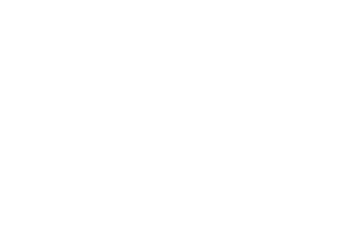

In [22]:
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

In [23]:
table(ax, df)

In [24]:
plt.savefig('asr_result.png')

<Figure size 432x288 with 0 Axes>

In [ ]:
df.to